## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata.head()
#study_results.head()
# Both tables can be merged using 	Mouse ID column header
# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer',on='Mouse ID')
# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mice_count = combined_df["Mouse ID"].value_counts()
print(len(mice_count))

249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df.loc[combined_df.duplicated(subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_data = pd.DataFrame(duplicate_mice)
#print(all_duplicate_data)
all_duplicate_data

,0
0,g989


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mice)==False]
#mice_df.head()

In [7]:
# Checking the number of mice in the clean DataFrame.
clean_count = mice_df["Mouse ID"].value_counts()
print(len(clean_count))

248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# use -> drug_xx = mice_df.groupby("Drug Regimen") & ["Tumor Volume (mm3)"]to set up all the statistical calculations
drug_mean = mice_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
#drug_mean
drug_median = mice_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
#drug_median
drug_variance = mice_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
#drug_variance
drug_std = mice_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
#drug_std
drug_sem = mice_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
#drug_sem



In [12]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
#generate columns and assign to variables
summary_drug_table = pd.DataFrame({"Mean": drug_mean, "Median": drug_median, "Variance": drug_variance, "Standard Deviation": drug_std, "SEM": drug_sem})
#summary_drug_table.round(3)
# save table as file just in case
summary_drug_table.to_csv("../actual outcomes/Drug_Regimen_Summary.csv", index=False, header=True)
# Using the aggregation method, produce the same summary statistics in a single line
single_group = mice_df.groupby("Drug Regimen")
summary_drug_table2 = single_group.agg(['mean',"median","var","std","sem"])["Tumor Volume (mm3)"]
#summary_drug_table2
summary_drug_table2.to_csv("../actual outcomes/Drug_Regimen_Summary_2.csv",index=False, header=True)

## Bar and Pie Charts

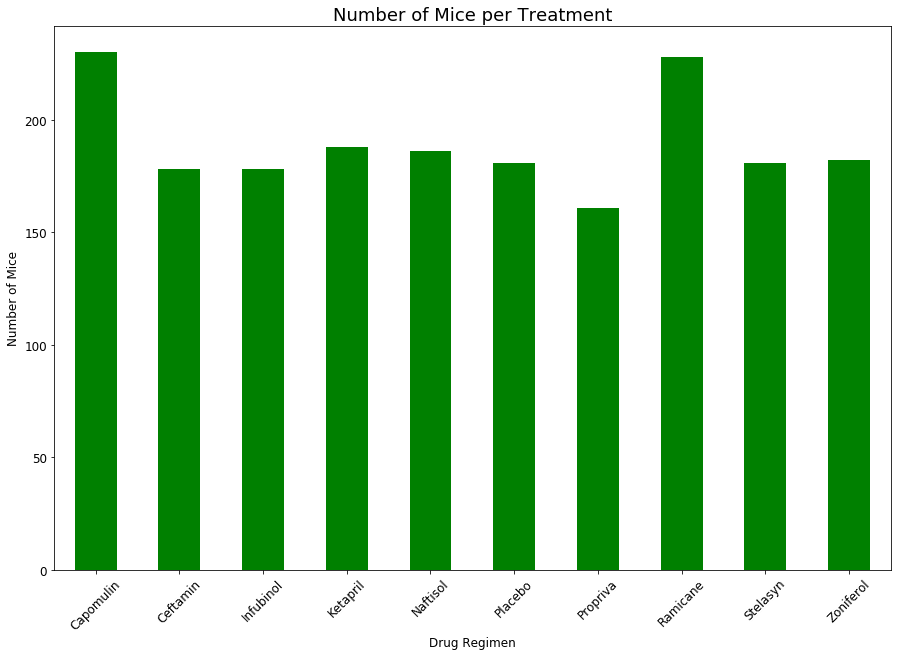

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     161
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [19]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
bar_count = combined_df.groupby(["Drug Regimen"]).count()["Mouse ID"]
plot_bar = bar_count.plot(kind="bar",figsize=(15,10), color='g', fontsize=12)
plt.xlabel("Drug Regimen",fontsize = 12)
plt.xticks(rotation=45)
plt.ylabel("Number of Mice",fontsize = 12)
plt.title("Number of Mice per Treatment",fontsize = 18)
plt.savefig("../actual outcomes/Regimen_Mice_Per_Treatment",bbox_inches="tight")
plt.show()
bar_count

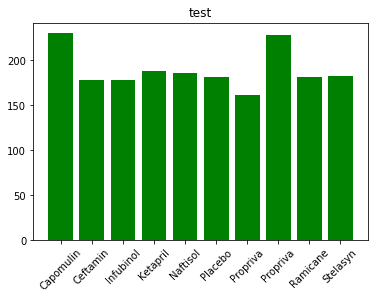

In [23]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

# make an array to store the total values from above
# assume measurement = weight (g) column
mice_count_list = (combined_df.groupby(["Drug Regimen"])["Weight (g)"].count()).tolist()
# set x axis to be equal to Regimen
# import numpy
import numpy as np
x_axis = np.arange(len(mice_count_list))
# make bar chart
plt.bar(x_axis, mice_count_list ,color='g', align='center')
#plt.show()
# set the ticks and add title and labels
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,['Capomulin','Ceftamin','Infubinol','Ketapril','Naftisol','Placebo','Propriva','Propriva','Ramicane','Stelasyn','Zoniferol'],rotation = 45)
plt.title("Number of Measurements Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Measurement Total")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
